# 📢 File explanation!!

Pada tahap ini, saya akan fokus melakukan Exploratory Data Analysis (EDA) terhadap data tanpa melakukan preprocessing terlebih dahulu. Preprocessing data akan dilakukan pada file selanjutnya.

# 🎯 **Step 0: Import library**
---

In [2]:
!pip -q install imojify

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import json
import nltk
import re

from imojify import imojify
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
from itertools import islice, chain
from nltk.tokenize import word_tokenize
from matplotlib.offsetbox import OffsetImage,AnnotationBbox
from sklearn.feature_extraction.text import CountVectorizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.1/142.1 MB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 26.6 MB/s eta 0:00:00


In [3]:
nltk.download('punkt')
nltk.download('stopwords')
plt.style.use('seaborn-v0_8')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
plt.style.use('seaborn-v0_8')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 🎯 **Step 1: Load dataset**
---

## ✨ 1.1 - Dataset messages

In [7]:
df_message = pd.read_csv('/content/drive/MyDrive/TUGAS AKHIR/Notebook/Dataset/PESAN TEKS/df_message.csv')

df_message.head()

,Data,Category
0,PEMBERITAHUAN RESMI\n\nAnda Terdaftar Sebagai ...,phishing
1,SELAMAT ANDA TERPILIH SEBAGAI PENERIMA DANA BA...,phishing
2,Langsung dapat ekstra 100% di depan\nUntuk pen...,phishing
3,PEMBERITAHUAN RESMI\nSelamat ANDA TERPILIH Seb...,phishing
4,"Gapai impianmu dsni, Ksmpatan emas\ninfo pst j...",phishing


## ✨ 1.2 - Dataset slang words

In [8]:
def load_dataset_slang(path):

  with open(path, 'r') as file:

    slang_words = json.load(file)

  return slang_words


def print_data(data):

  for key, value in islice(data.items(), 5):

    print(key, value)

In [10]:
path = [
    '/content/drive/MyDrive/TUGAS AKHIR/Notebook/Dataset/SLANG WORDS/json_slang_words1',
    '/content/drive/MyDrive/TUGAS AKHIR/Notebook/Dataset/SLANG WORDS/json_slang_words2',
    '/content/drive/MyDrive/TUGAS AKHIR/Notebook/Dataset/SLANG WORDS/json_slang_words3'
]

slang_words1 = load_dataset_slang(path[0])

slang_words2 = load_dataset_slang(path[1])

slang_words3 = load_dataset_slang(path[2])

In [11]:
print_data(slang_words1)

@ di
abis setelah
ad ada
adlh adalah
afaik as far as i know


In [12]:
print_data(slang_words2)

aamiin amin 
adek adik 
adlh adalah 
aer air 
aiskrim es krim 


In [13]:
print_data(slang_words3)

woww wow
aminn amin
met selamat
netaas menetas
keberpa keberapa


## ✨ 1.3 - Dataset emoji

In [15]:
path =  '/content/drive/MyDrive/TUGAS AKHIR/Notebook/Dataset/EMOJI/df_emoji.csv'

df_emoji = pd.read_csv(path)

df_emoji.head()

,emoji-symbol,meaning,meaning-indo,emoji-unicode,emoji-name,emoji-name-indo
0,😄,smiley,tersenyum,ðŸ˜„,grinning face with smiling eyes,wajah menyeringai dengan mata tersenyum
1,😃,smiley,tersenyum,ðŸ˜ƒ,grinning face with big eyes,wajah menyeringai dengan mata besar
2,😀,smiley,tersenyum,ðŸ˜€,grinning face,wajah menyeringai
3,😊,smiley,tersenyum,ðŸ˜Š,smiling face with smiling eyes,wajah tersenyum dengan mata tersenyum
4,🙂,blush,memerah,â˜ºï¸,slightly smiling face,Wajah yang sedikit tersenyum


In [16]:
emoji_dict = dict(zip(df_emoji['emoji-symbol'], df_emoji['meaning-indo']))

print_data(emoji_dict)

😄 tersenyum
😃 tersenyum
😀 tersenyum
😊 tersenyum
🙂 memerah


# 🎯 **Step 2: Check data info**
---

In [17]:
df_message.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1899 entries, 0 to 1898
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Data      1899 non-null   object
 1   Category  1899 non-null   object
dtypes: object(2)
memory usage: 29.8+ KB


# 🎯 **Step 3: Check duplicate data**
---

In [18]:
duplicate = df_message.duplicated().sum()

duplicate

0

🚧 Berdasarkan informasi di atas tidak terdapat data terduplikasi

# 🎯 **Step 4: Check null values**
---

<Axes: >

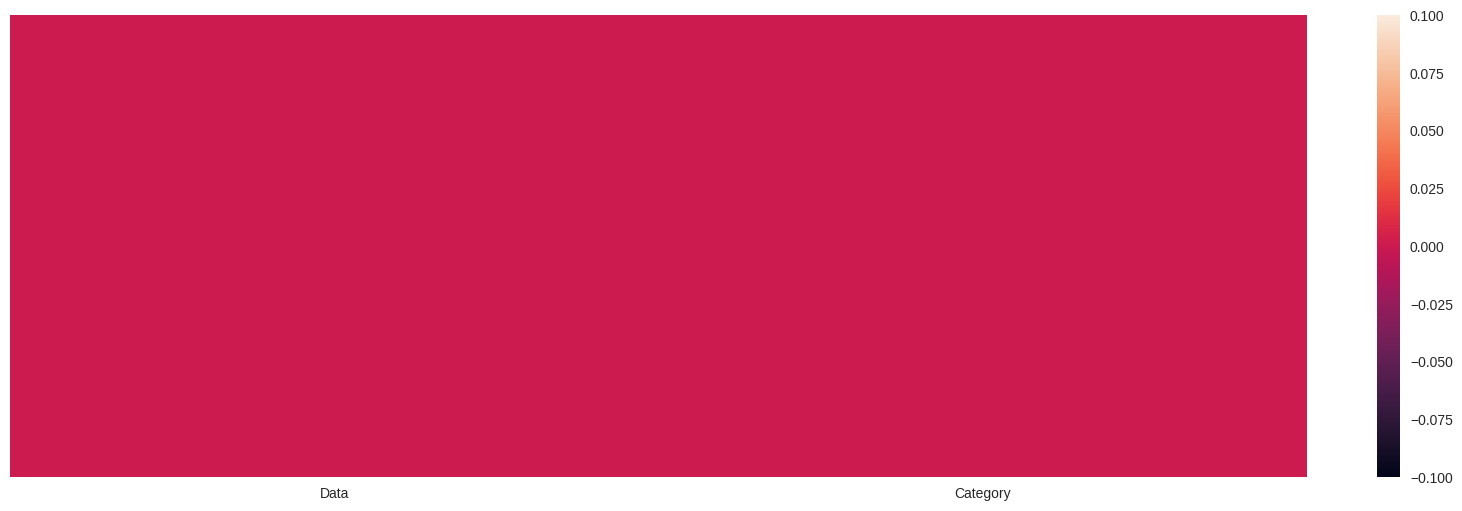

In [19]:
plt.figure(figsize=(18, 6))

sns.heatmap(df_message.isnull(), yticklabels=False, cbar=True, cbar_kws={'fraction': 0.02})

In [20]:
def detect_null_values(data):
    null_column = data.columns[data.isnull().any()]

    head_column = ["Column name", "Total nulls", "Total nulls (%)", "Data type"]

    null_info = pd.DataFrame(columns=head_column)

    for column in null_column:

        total_null = data[column].isnull().sum()

        total_null_percent = (total_null / len(data)) * 100

        data_type = data[column].dtype

        null_info = pd.concat([null_info, pd.DataFrame([[column, total_null, total_null_percent, data_type]], columns=head_column)],  ignore_index=True)

    return null_info

In [21]:
null_info = detect_null_values(df_message)

null_info

,Column name,Total nulls,Total nulls (%),Data type


🚧 Berdasarkan informasi di atas dapat diketahui bahwasanya tidak terdapat null values.

# 🎯 **Step 5: Compare the distribution of the "Category" column.**

---



In [22]:
df_message['Category'] = df_message['Category'].replace('phishing', 'smishing')
df_message['Category'] = df_message['Category'].replace('non-phishing', 'non-smishing')

In [23]:
url_counts = df_message['Category'].value_counts(ascending=True)

url_counts

Category
smishing        944
non-smishing    955
Name: count, dtype: int64

<ipython-input-24-0562af5b234a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=url_counts.index, y=url_counts.values, palette='magma')


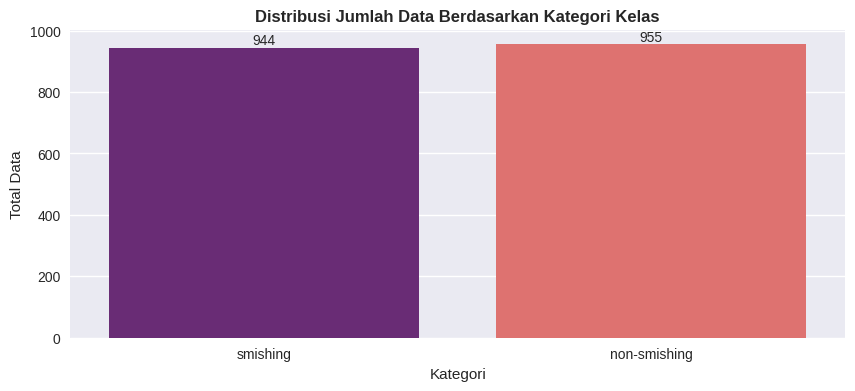

In [24]:
plt.figure(figsize=(10, 4))

ax = sns.barplot(x=url_counts.index, y=url_counts.values, palette='magma')

for p in ax.containers:
  ax.bar_label(p,)

plt.xlabel('Kategori')

plt.ylabel('Total Data')

plt.title('Distribusi Jumlah Data Berdasarkan Kategori Kelas', fontweight="bold")

plt.show()

🚧 Berdasarkan grafik di atas dapat diketahui bahwa sebaran data seimbang dan hanya berbeda sedikit sehingga tidak perlu dilakukan balancing data

# 🎯 **Step 6: Check Message length (Character based)**

---

In [25]:
df_message['message_length'] = df_message['Data'].apply(len)

## ✨ 6.1 - Barplot

In [26]:
def plot_text_length(df, column, label):

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    fig.suptitle('Panjang Pesan Minimum dan Maksimum berdasarkan Kategori', fontweight="bold")

    df.groupby(label)[column].min().plot(kind='bar', ax=axes[0], alpha=0.6)
    axes[0].set_title('Panjang Pesan Minimal')
    axes[0].set_ylabel('Panjang Pesan')
    for p in axes[0].containers:
        axes[0].bar_label(p,)

    df.groupby(label)[column].max().plot(kind='bar', ax=axes[1], alpha=0.6)
    axes[1].set_title('Panjang Pesan Maksimal')
    axes[1].set_ylabel('Panjang Pesan')
    for p in axes[1].containers:
        axes[1].bar_label(p,)

    plt.show()

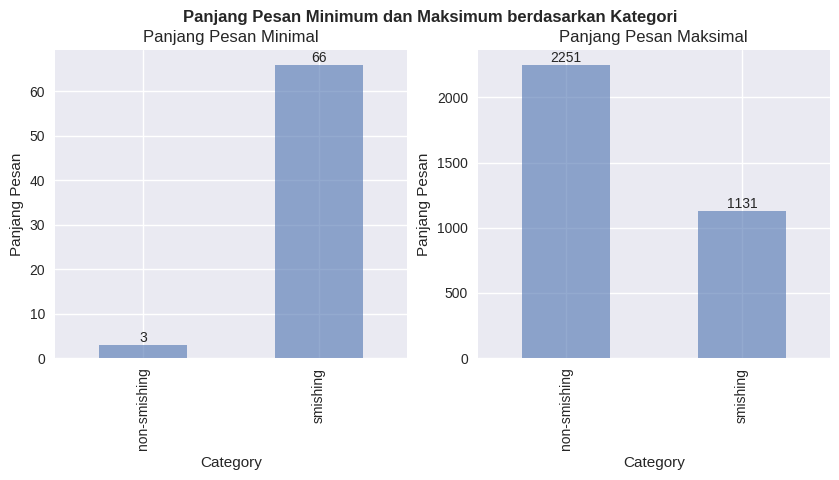

In [27]:
plot_text_length(df_message, 'message_length', 'Category')

🚧 Berdasarkan grafik di atas dapat diketahui sebagai berikut:
- Panjang minimal url untuk kategori Phishing ialah sekitar 66 dan maksimal panjangnya sekitar 1131
- Panjang minimal url untuk kategori Non-Phishing ialah sekitar 3 dan maksimal panjangnya sekitar 2251

Kategori yang mempunyai panjang url terpendek dan terpanjang ialah NonPhishing.

## ✨ 6.2 - Boxplot

<ipython-input-28-6a2cb98e466e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Category', y='message_length', data=df_message, palette='rocket', whis=3.0)


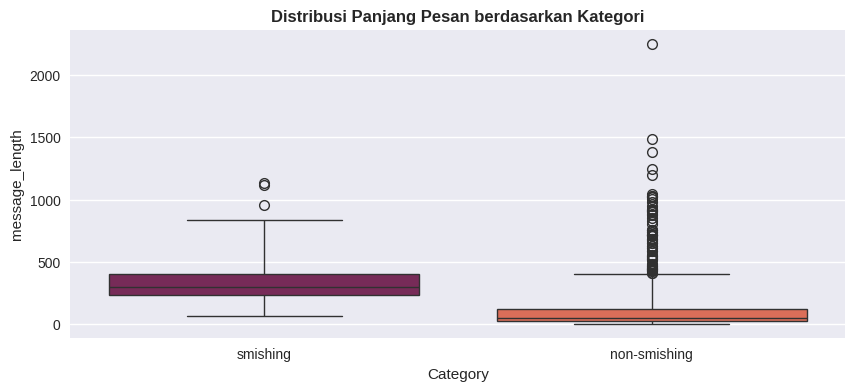

In [28]:
plt.figure(figsize=(10, 4))

ax = sns.boxplot(x='Category', y='message_length', data=df_message, palette='rocket', whis=3.0)

plt.title('Distribusi Panjang Pesan berdasarkan Kategori', fontweight="bold")

plt.show()

🚧 Berdasarkan grafik di atas dapat dilihat bahwasanya mayoritas panjang pesan ialah melebih Q3 dari data baik Phishing maupun Non-phishing.

In [29]:
df_message.groupby('Category')['message_length'].mean()

Category
non-smishing    123.786387
smishing        330.254237
Name: message_length, dtype: float64

🚧 Kemudian rata-rata panjang URL untuk kategori Phishing sekitar 330 dan untuk Non-phishing sekitar 124.

# 🎯 **Step 7: Check the words unigram, bigram, trigrams that often appear**

---


🔎 Pada tahap ini saya menggunakan perpustakaan `CountVectorizer` dari Sklearn untuk menghitung frekuensi kemunculan kata dari unigram, bigram, dan trigram. Lalu saya filter untuk menampilkan 10 kata teratas yang paling banyak kemunculannya

In [30]:
def get_top_ngrams(corpus, ngram_range, stop_words=None, n=None):

    vectorizer = CountVectorizer(stop_words=stop_words, ngram_range=ngram_range)

    X = vectorizer.fit_transform(corpus)

    words = vectorizer.get_feature_names_out()

    freqs = X.sum(axis=0).A1

    df = pd.DataFrame({'Data': words, 'Frequency': freqs})

    df = df.sort_values(by='Frequency', ascending=False).head(n).reset_index(drop=True)

    return df

def plot_to_graph(plot_data):

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    # axes[1, 1].axis('off')

    for i, plot_info in enumerate(plot_data):

        ax = axes[i]

        sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)

        for p in ax.patches:
            ax.annotate(f'{int(p.get_width())}', (p.get_x() + p.get_width(), p.get_y() + 0.5), ha='right', va='center', color='white')

        ax.set_title(plot_info['title'], fontweight="bold")

    plt.tight_layout()

    plt.show()

In [33]:
df_phishing = df_message[df_message['Category'] == 'smishing']

df_nonphishing = df_message[df_message['Category'] == 'non-smishing']

## ✨ 7.1 - Unigram

In [34]:
stop_words = None

n = 10

unigram_phishing = get_top_ngrams(df_phishing['Data'], (1, 1), stop_words, n)

unigram_nonphishing = get_top_ngrams(df_nonphishing['Data'], (1, 1), stop_words, n)

unigram_phishing.head()


,Data,Frequency
0,anda,1253
1,untuk,1012
2,kami,917
3,dan,883
4,yang,693


<ipython-input-30-9436c91abedd>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)
<ipython-input-30-9436c91abedd>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)


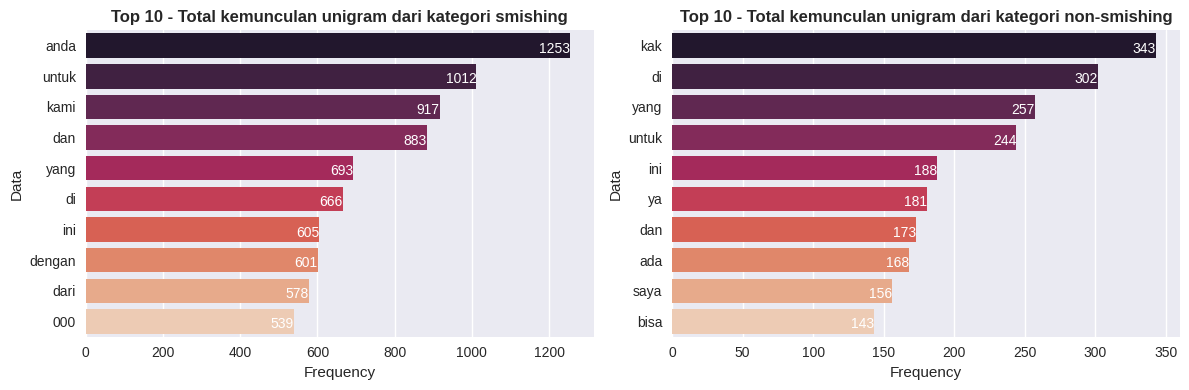

In [35]:
plot_data = [

    {'data': unigram_phishing, 'title': 'Top 10 - Total kemunculan unigram dari kategori smishing'},

    {'data': unigram_nonphishing, 'title': 'Top 10 - Total kemunculan unigram dari kategori non-smishing'},
]

plot_to_graph(plot_data)

🚧 Berdasarkan grafik di atas dapat dilihat bahwasanya 3 unigram teratas pada masing-masing kategori tidaklah sama

## ✨ 7.2 - Bigram

In [36]:
stop_words = None

n = 10

bigram_phishing = get_top_ngrams(df_phishing['Data'], (2, 2), stop_words, n)

bigram_nonphishing = get_top_ngrams(df_nonphishing['Data'], (2, 2), stop_words, n)

bigram_phishing.head()


,Data,Frequency
0,000 000,188
1,anda telah,153
2,paruh waktu,132
3,https www,128
4,terima kasih,119


<ipython-input-30-9436c91abedd>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)
<ipython-input-30-9436c91abedd>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)


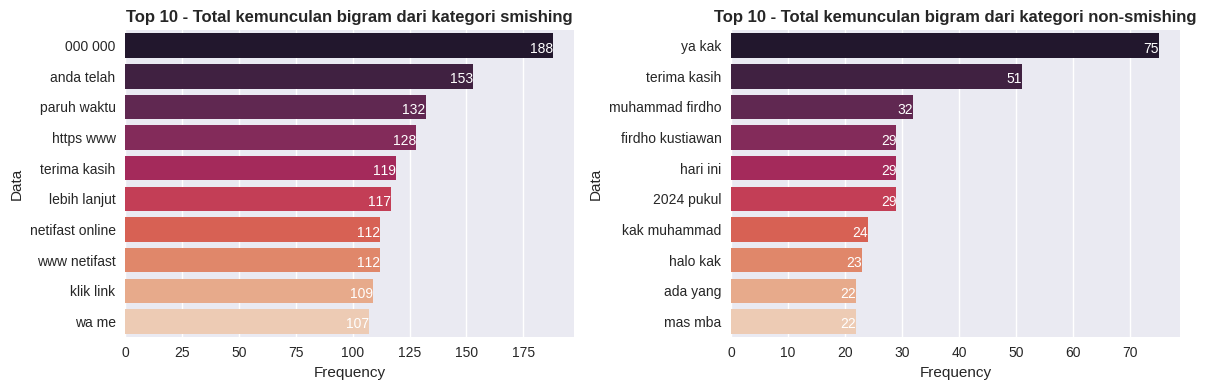

In [38]:
plot_data = [

    {'data': bigram_phishing, 'title': 'Top 10 - Total kemunculan bigram dari kategori smishing'},

    {'data': bigram_nonphishing, 'title': 'Top 10 - Total kemunculan bigram dari kategori non-smishing'},
]

plot_to_graph(plot_data)

🚧 Berdasarkan grafik di atas dapat dilihat bahwasanya bigram pada masing-masing kategori untuk posisi 3 teratas ialah tidak samah

## ✨ 7.3 - Trigram

In [39]:
stop_words = None

n = 10

trigram_phishing = get_top_ngrams(df_phishing['Data'], (3, 3), stop_words, n)

trigram_nonphishing = get_top_ngrams(df_nonphishing['Data'], (3, 3), stop_words, n)

trigram_phishing.head()


,Data,Frequency
0,https www netifast,112
1,www netifast online,112
2,di bawah ini,83
3,informasi lebih lanjut,82
4,https wa me,64


<ipython-input-30-9436c91abedd>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)
<ipython-input-30-9436c91abedd>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)


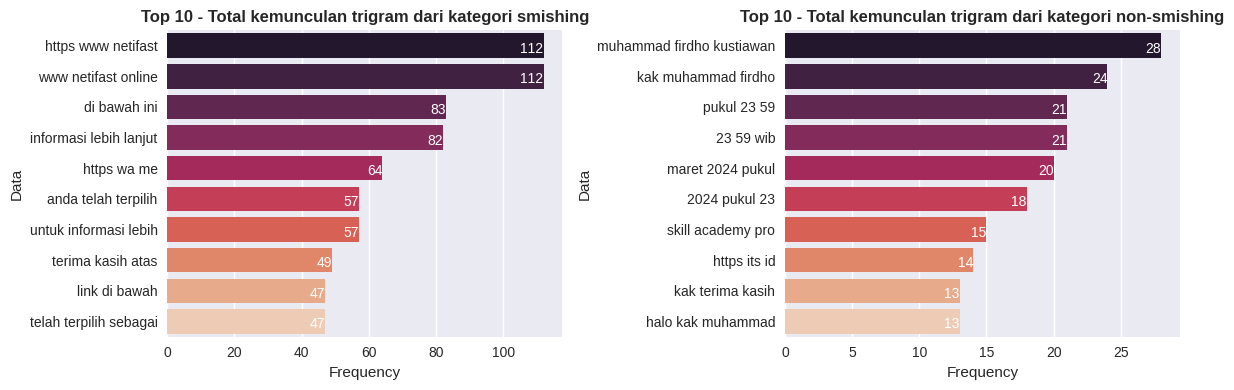

In [40]:
plot_data = [

    {'data': trigram_phishing, 'title': 'Top 10 - Total kemunculan trigram dari kategori smishing'},

    {'data': trigram_nonphishing, 'title': 'Top 10 - Total kemunculan trigram dari kategori non-smishing'},
]

plot_to_graph(plot_data)

🚧 Berdasarkan grafik di atas dapat dilihat bahwasanya masih sama seperti sebelum sebelumnya


# 🎯 **Step 8: Check the wordcloud**

---


🔎 At this stage I display a wordcloud from each class of course with additions from all classes

In [44]:
def create_wordcloud(palette, data_target):

    sentiment_data = ' '.join(data_target)

    wordcloud = WordCloud(background_color='black', colormap=palette, collocations=False).generate(sentiment_data)

    return wordcloud

def plot_wordcloud(plot_data):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 9))

    for i, plot_info in enumerate(plot_data):

        col = i % 2
        ax = axes[col]

        ax.imshow(plot_info['data'], interpolation='bilinear')
        ax.axis("off")
        ax.set_title(plot_info['title'], fontsize=28)

    plt.tight_layout()
    plt.show()

In [45]:
wordcloud_nonphishing = create_wordcloud('Greens', df_nonphishing['Data'])

wordcloud_phishing = create_wordcloud('Reds', df_phishing['Data'])

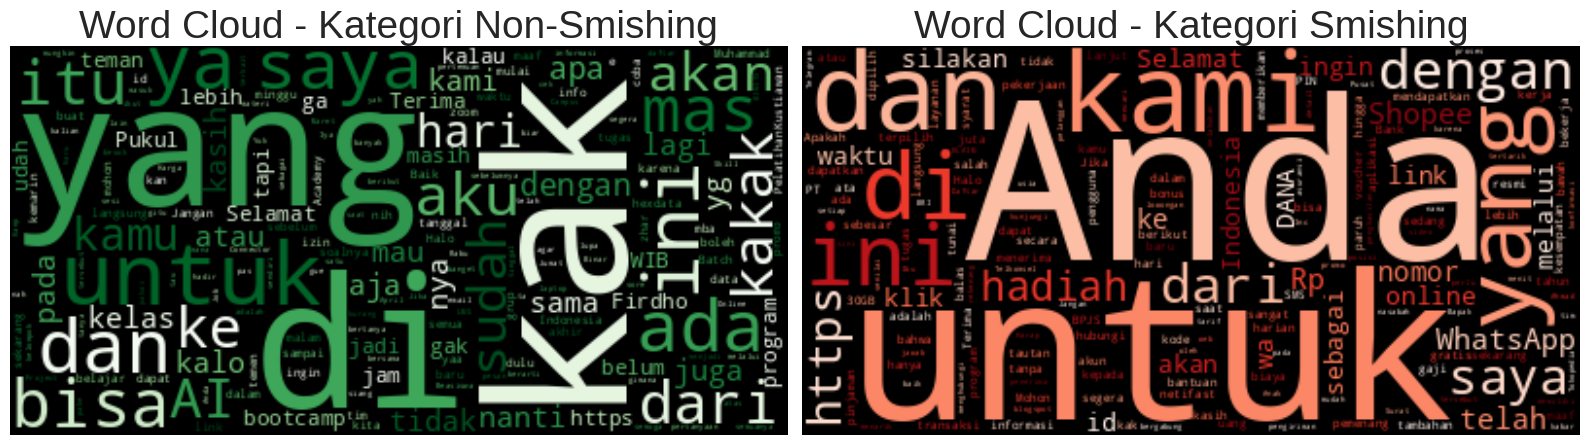

In [46]:
# Contoh penggunaan
plot_data = [

    {'data': wordcloud_nonphishing, 'title': 'Word Cloud - Kategori Non-Smishing'},

    {'data': wordcloud_phishing, 'title': 'Word Cloud - Kategori Smishing'}
]

plot_wordcloud(plot_data)

# 🎯 **Step 9: Check the most frequently used hashtags and understand its impact**
---


🔎 Stage 7 I checked the 7 hashtags that were written the most during the 2019 election, which of course was based on sentiment class. Then I try to understand the role of hashtags in a sentiment, whether they support that sentiment category or not.

In [47]:
def hashtag_extract(x):

    hashtags = []    # Loop over the words in the tweet

    for i in x:

        ht = re.findall(r"#(\w+)", i)

        hashtags.append(ht)

    return hashtags

def convert_to_dataframe(fdist, top_n=7):

    freq_dist_dict = dict(fdist.most_common(top_n))

    df = pd.DataFrame(list(freq_dist_dict.items()), columns=['Data', 'Frequency'])

    return df

In [48]:
hashtag_nonphishing = hashtag_extract(df_nonphishing['Data'])

hashtag_phishing = hashtag_extract(df_phishing['Data'])

🚧 The result of the coding above is an array within an array, as follows

```Python
[
  [],
  [],
  ['UASdifitnahKejiBalasDiTPS', 'UASdifitnahKejiBalasDiTPS'],
  ['PilihOrangBaik', 'PilihJelasIslamnya', 'PilihBajuPutih'],
  ['2019JokowiKyaiMaruf'],
  ....
]
```

🔎 Then I made 1 single list with the code below



In [49]:
hashtag_nonphishing = list(chain.from_iterable(hashtag_nonphishing))

hashtag_phishing = list(chain.from_iterable(hashtag_phishing))

🚧 The output results from the code above are as follows

```Python
['UASdifitnahKejiBalasDiTPS',
 'UASdifitnahKejiBalasDiTPS',
 'PilihOrangBaik',
 'PilihJelasIslamnya',
 'PilihBajuPutih',
 '2019JokowiKyaiMaruf',
 ....
]
```



In [50]:
hashtag_nonphishing = convert_to_dataframe(Counter(hashtag_nonphishing))

hashtag_phishing = convert_to_dataframe(Counter(hashtag_phishing))

In [51]:
hashtag_phishing

,Data,Frequency
0,Help,16
1,PromosiRandomUntukSeluruhIndonesia,1


🚧 The output results from the code above are as follows

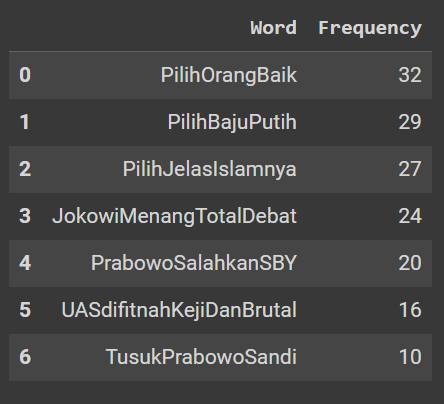

🔎 Then I displayed it using the `plot_to_graph` function coding from Step 5

<ipython-input-30-9436c91abedd>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)
<ipython-input-30-9436c91abedd>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)


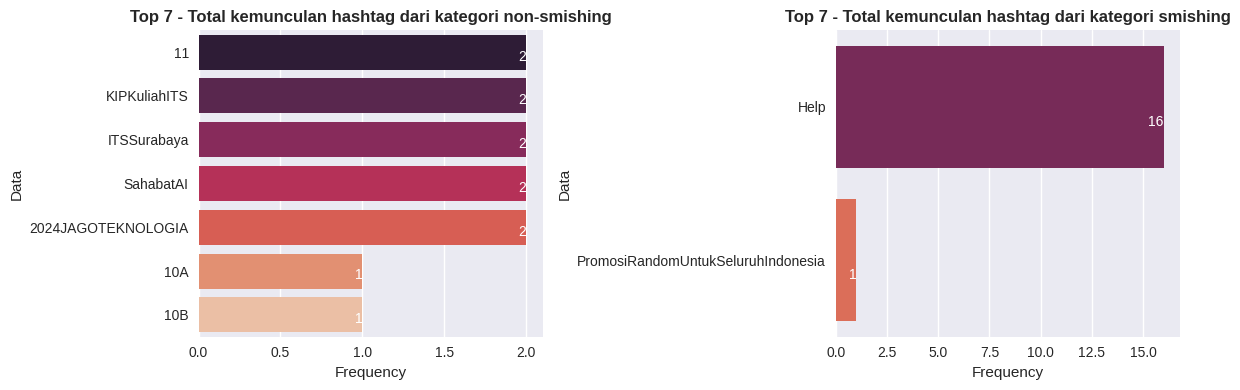

In [52]:
# Contoh penggunaan
plot_data = [

    {'data': hashtag_nonphishing, 'title': 'Top 7 - Total kemunculan hashtag dari kategori non-smishing'},

    {'data': hashtag_phishing, 'title': 'Top 7 - Total kemunculan hashtag dari kategori smishing'},
]

plot_to_graph(plot_data)

🚧 Berdasarkan gambar di atas, mayoritas hashtag tidak mendeskripsikan atau mendukung suatu kategori. Berdasarkan temuan di atas, maka hashtag pada tahap preprocessing nantinya akan saya hapus karena hashtag tidak berperan penting dalam mendukung kategori pesan.

# 🎯 **Step 10: Check the most frequently used emojis and understand its impact**

---



🔎 Pada tahap ini saya hanya akan menampilkan 7 emoji yang paling sering digunakan

In [53]:
emoji_list = df_emoji['emoji-symbol'].tolist()

🚧 The code above will produce the following output

```Python
['😄', '😃', '😀', '😊', '🙂', ....]
```



In [54]:
emoji_for_regex = '|'.join(re.escape(emoji) for emoji in emoji_list)


del emoji_list

🚧 Kode di atas berfungsi untuk mengubah output `emoji_list` menjadi pola regex (regular expression) yang dapat digunakan untuk mencocokkan teks yang berisi emoji. Berikut hasil output dari coding diatas


```Python
'😄'|'😃'|'😀'|'😊'|'🙂'| ....]
```



In [55]:
emoji_for_symbol_mapping = {unicode: symbol for unicode, symbol in zip(df_emoji['emoji-symbol'], df_emoji['emoji-symbol'])}

🚧 Membuat pemetaan antara nilai simbol emoji dan simbol emoji yang sesuai. Berikut hasil keluarannya

```Python
{'😄': '😄',
 '😃': '😃',
 '😀': '😀',
 '😊': '😊',
 '🙂': '🙂',
  ....
}
```



In [56]:
def emoji_extract(tweet):

    emojis = re.findall(emoji_for_regex, tweet)

    return emojis

def offset_image(cords, emoji, ax):

    img = plt.imread(imojify.get_img_path(emoji))

    im = OffsetImage(img, zoom=0.05)

    im.image.axes = ax

    ab = AnnotationBbox(im, (cords[0], cords[1]), frameon=False, pad=0)

    ax.add_artist(ab)

def plot_emoji(plot_data):

    fig, axes = plt.subplots(1, 2, figsize=(12, 7))

    for i, plot_info in enumerate(plot_data):

        emjis = plot_info['data']['Word']

        values = plot_info['data']['Frequency']

        title = plot_info['title']

        ax = axes[i % 2]

        ax.bar(range(len(emjis)), values, width=0.5, align="center")

        ax.set_xticks(range(len(emjis)))

        ax.set_xticklabels([])

        ax.tick_params(axis='x', which='major', pad=26)

        ax.set_ylim((0, ax.get_ylim()[1] + 10))

        for j, e in enumerate(emjis):

            offset_image([j, values[j] + 5], e, ax)

        ax.set_title(title, fontsize=12)

    plt.show()


In [57]:
emoji_nonphishing = df_nonphishing['Data'].apply(emoji_extract)

emoji_phishing = df_phishing['Data'].apply(emoji_extract)

🚧 Hasil coding di atas berupa array di dalam array, sebagai berikut

```Python
0       ['😄', '😄']
1                 []
2                 []
3                 []
4                 []
            ...     
```



In [58]:
emoji_nonphishing = [emoji for emojis_list in emoji_nonphishing for emoji in emojis_list]

emoji_phishing = [emoji for emojis_list in emoji_phishing for emoji in emojis_list]

🚧 Kode di atas berfungsi untuk mengambil simbol emoji dan menjadikannya sebuah list. Hasil dari coding di atas berupa array di dalam array, sebagai berikut

```Python
['😊',
 '👇',
 '👇',
 '🔔',
 '🔔',
 ....
]
```



In [59]:
emoji_nonphishing = [emoji_for_symbol_mapping.get(unicode, unicode) for unicode in emoji_nonphishing]

emoji_phishing = [emoji_for_symbol_mapping.get(unicode, unicode) for unicode in emoji_phishing]

🚧 The code above aims to change the unicode obtained from the previous step into emoji.

```Python
['👇',
 '😜',
 '😂',
 '🙏',
 '👍',
 ....
]
```



In [60]:
emoji_nonphishing = convert_to_dataframe(Counter(emoji_nonphishing))

emoji_phishing = convert_to_dataframe(Counter(emoji_phishing))

In [61]:
emoji_nonphishing.rename(columns={'Data': 'Word'}, inplace=True)
emoji_phishing.rename(columns={'Data': 'Word'}, inplace=True)

In [62]:
emoji_nonphishing

,Word,Frequency
0,🙏,33
1,😊,28
2,📍,19
3,🔥,16
4,✨,15
5,🙌,14
6,🚀,12


🚧 The result of the coding above is an array within an array, as follows:

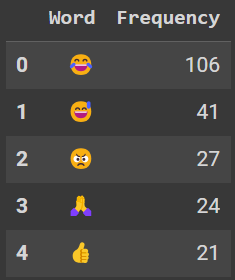

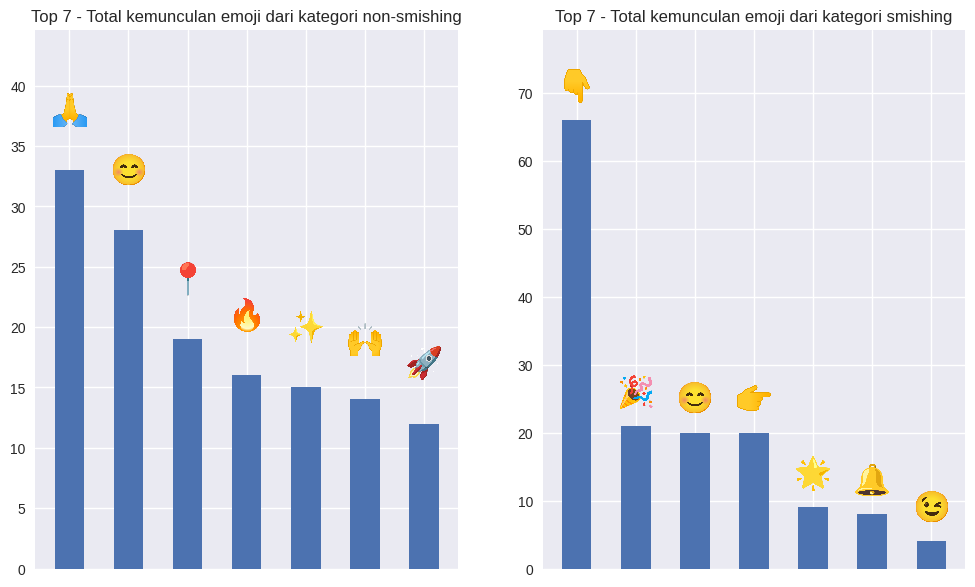

In [63]:
# Contoh penggunaan
plot_data = [

    {'data': emoji_nonphishing, 'title': 'Top 7 - Total kemunculan emoji dari kategori non-smishing'},

    {'data': emoji_phishing, 'title': 'Top 7 - Total kemunculan emoji dari kategori smishing'},
]

plot_emoji(plot_data)

🚧 Berdasarkan informasi gambar di atas, ada hal yang menarik yaitu emoji `😊` ada di setiap kategori kelas. Selain itu juga dapat dipahami bahwa dampak emoji dari masing-masing kelas tidak terlalu berdampak karena tidak ada emoji yang mewakili atau mendukung kategori kelas sehingga nantinya saya akan menghapusnya pada tahap preprocessing data.

# 🎯 **Step 11: Check the most frequently used @ and understand its impact**

---



In [64]:
def mention_extract(x):

    mentions = []

    for i in x:

        mention = re.findall(r"@(\w+)", i)

        mentions.extend(mention)

    return mentions

In [65]:
mentions_nonphishing = mention_extract(df_nonphishing['Data'])

mentions_phishing = mention_extract(df_phishing['Data'])

In [66]:
mentions_nonphishing = convert_to_dataframe(Counter(mentions_nonphishing))

mentions_phishing = convert_to_dataframe(Counter(mentions_phishing))

In [67]:
# mentions_nonphishing.rename(columns={'Data': 'Word'}, inplace=True)
# mentions_phishing.rename(columns={'Data': 'Word'}, inplace=True)

In [68]:
mentions_nonphishing

,Data,Frequency
0,Indonesia,2
1,pensid_bot,2
2,gmail,1
3,BIMITSKWUSTORE,1
4,bangkit,1
5,ruangguru,1


🚧 The output results from the code above are as follows

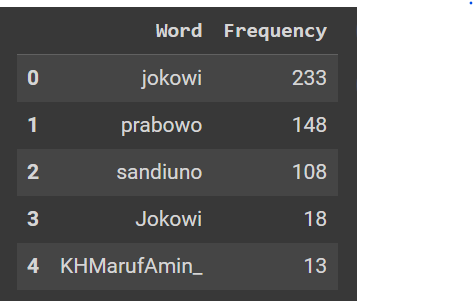

<ipython-input-30-9436c91abedd>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)
<ipython-input-30-9436c91abedd>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)


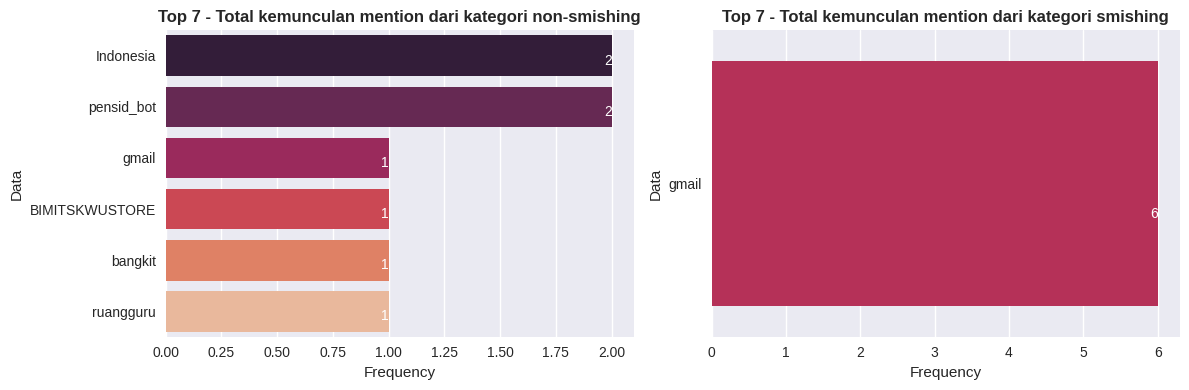

In [69]:
# Contoh penggunaan
plot_data = [

    {'data': mentions_nonphishing, 'title': 'Top 7 - Total kemunculan mention dari kategori non-smishing'},

    {'data': mentions_phishing, 'title': 'Top 7 - Total kemunculan mention dari kategori smishing'},
]

plot_to_graph(plot_data)

🚧 Berdasarkan gambar diatas terlihat bahwa mention tidak berperan dalam menampilkan kategori suatu sentimen, maka dari itu metion tersebut akan saya hapus.